<a href="https://colab.research.google.com/github/ro-prates/data_science/blob/master/projeto_arvores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [58]:
loans = pd.read_csv('/content/loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [59]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Text(0.5, 0, 'FICO')

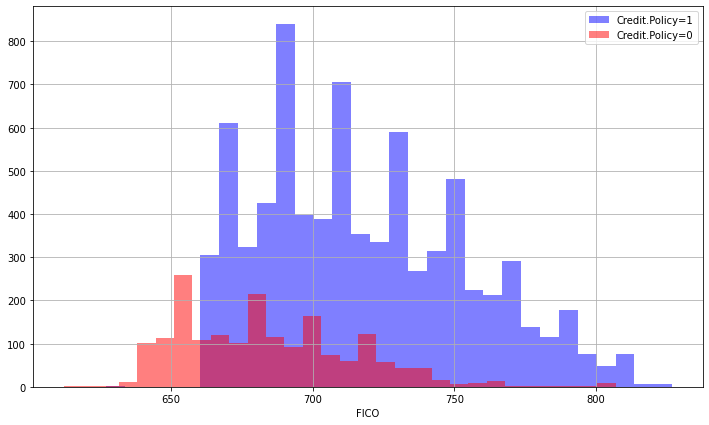

In [60]:
plt.figure(figsize=(12, 7))
loans[loans['credit.policy'] == 1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='Credit.Policy=1')
loans[loans['credit.policy'] == 0]['fico'].hist(alpha=0.5, color='red', bins=30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

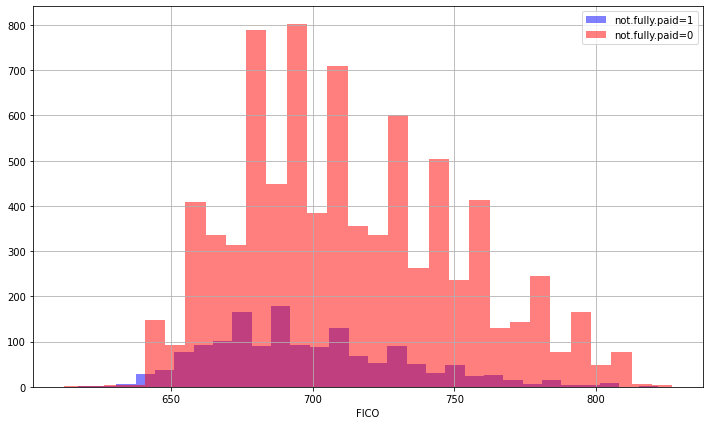

In [61]:
plt.figure(figsize=(12, 7))
loans[loans['not.fully.paid'] == 1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='not.fully.paid=1')
loans[loans['not.fully.paid'] == 0]['fico'].hist(alpha=0.5, color='red', bins=30, label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

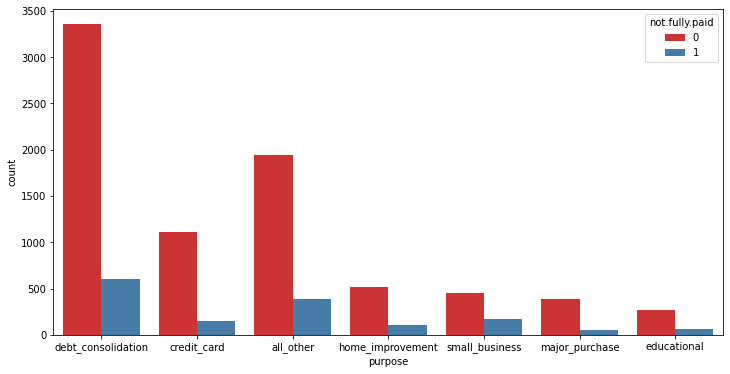

In [62]:
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', hue='not.fully.paid', data=loans, palette='Set1')

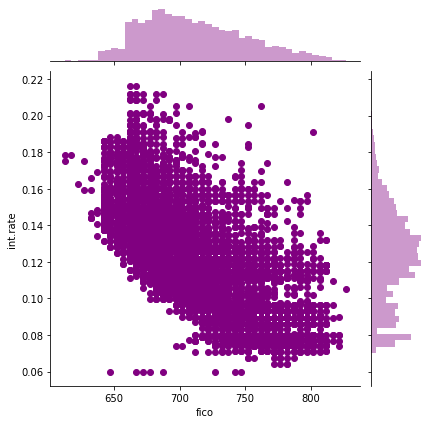

In [63]:
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')

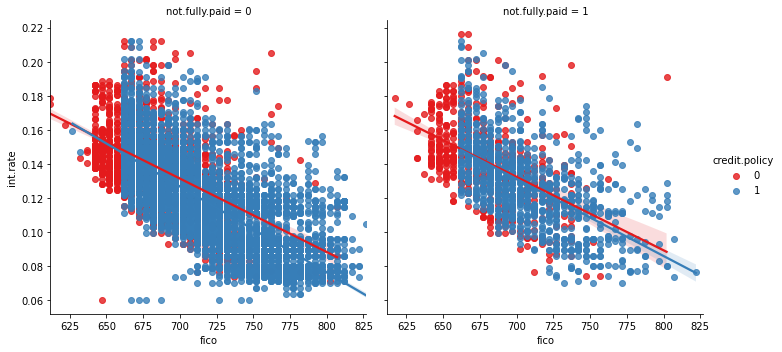

In [64]:
sns.lmplot(x='fico', y='int.rate', data=loans, hue='credit.policy', col='not.fully.paid', palette='Set1')

In [65]:
loans['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [66]:
obtem_purpose = ['purpose']

In [67]:
final_data = pd.get_dummies(loans, drop_first=True)

In [68]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
x = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101) 

In [71]:
dtree = DecisionTreeClassifier()

In [72]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [73]:
pred = dtree.predict(x_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [76]:
print(confusion_matrix(y_test, pred))

[[2006  425]
 [ 342  101]]


In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rfc = RandomForestClassifier(n_estimators=500)

In [79]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
pred = rfc.predict(x_test)

In [81]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



In [82]:
print(confusion_matrix(y_test, pred))

[[2421   10]
 [ 433   10]]
